In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [17]:
# Generate a synthetic dataset with 300 samples and 2 features
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])

In [18]:
def initialize_centroids(data, k):
    # Randomly initialize the centroids from the data points
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    return centroids

In [19]:
def compute_distances(data, centroids):
    # Compute the distances between each data point and centroids
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return distances

In [20]:
def assign_clusters(distances):
    # Assign each data point to the closest centroid
    clusters = np.argmin(distances, axis=1)
    return clusters

In [21]:
def update_centroids(data, clusters, k):
    # Update the centroids by computing the mean of the points in each cluster
    centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    return centroids

In [22]:
def k_means(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        distances = compute_distances(data, centroids)
        clusters = assign_clusters(distances)
        new_centroids = update_centroids(data, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

In [23]:
def initialize_medoids(data, k):
    # Randomly initialize the medoids from the data points
    medoids = data[np.random.choice(range(len(data)), k, replace=False)]
    return medoids

In [24]:
def compute_dissimilarities(data, medoids):
    # Compute the dissimilarities between each data point and medoids
    dissimilarities = np.sum(np.abs(data[:, np.newaxis] - medoids), axis=2)
    return dissimilarities

In [25]:
def assign_clusters(dissimilarities):
    # Assign each data point to the closest medoid
    clusters = np.argmin(dissimilarities, axis=1)
    return clusters

In [26]:
def update_medoids(data, clusters, k):
    # Update the medoids by selecting the data point with the minimum sum of dissimilarities in each cluster
    medoids = np.array([data[clusters == i][np.argmin(np.sum(np.abs(data[clusters == i][:, np.newaxis] - data[clusters == i]), axis=2))] for i in range(k)])
    return medoids

In [27]:
def k_medoids(data, k, max_iterations=100):
    medoids = initialize_medoids(data, k)
    for _ in range(max_iterations):
        dissimilarities = compute_dissimilarities(data, medoids)
        clusters = assign_clusters(dissimilarities)
        new_medoids = update_medoids(data, clusters, k)
        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids
    return medoids, clusters

In [32]:
# Compute the total within-cluster sum of squares
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] - centroids[i])) for i in range(k)])
print("Total within-cluster sum of squares: ", wcss)

Total within-cluster sum of squares:  17.46619760906058


Total within-cluster sum of squares (K-means):  69.89087699480122
Total within-cluster sum of squares (K-medoids):  27.01281751698994


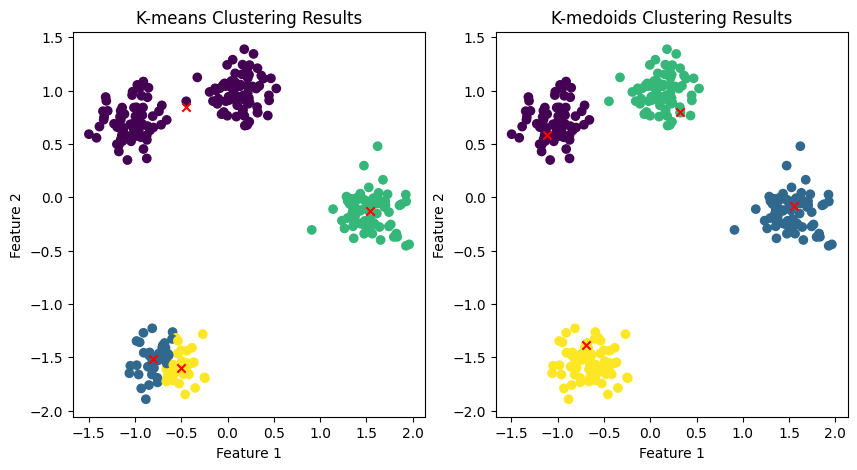

In [35]:

# NEW: Run K-means and K-medoids algorithms with the generated dataset
k = 4

# Run K-means
centroids_kmeans, clusters_kmeans = k_means(data_scaled, k)
wcss_kmeans = np.sum([np.sum(np.square(data_scaled[clusters_kmeans == i] - centroids_kmeans[i])) for i in range(k)])
print("Total within-cluster sum of squares (K-means): ", wcss_kmeans)

# Run K-medoids
medoids_kmedoids, clusters_kmedoids = k_medoids(data_scaled, k)
wcss_kmedoids = np.sum([np.sum(np.square(data_scaled[clusters_kmedoids == i] - medoids_kmedoids[i])) for i in range(k)])
print("Total within-cluster sum of squares (K-medoids): ", wcss_kmedoids)

# Plot the dataset with the assigned clusters and centroids/medoids
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_kmeans, cmap='viridis')
plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='red', marker='x')
plt.title('K-means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_kmedoids, cmap='viridis')
plt.scatter(medoids_kmedoids[:, 0], medoids_kmedoids[:, 1], c='red', marker='x')
plt.title('K-medoids Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()